In [1]:
import networkx as nx
import matplotlib.pyplot as plt


def generate_barbell(n_clique=10, n_path = 10):

    clique1 = nx.complete_graph(n_clique)
    clique1_pos = nx.circular_layout(clique1)
    clique2 = nx.complete_graph(n_clique)
    clique2_mapping = {node: node + n_clique for node in clique2}
    nx.relabel_nodes(clique2, clique2_mapping, copy=False) # avoids repeated nodes
    x_diff, y_diff = 8, -1
    clique2_pos = {node: clique1_pos[node-n_clique] + (x_diff, y_diff) for node in clique2}
    path = nx.path_graph(n_path)
    path_mapping = {node: node + 2 * n_clique for node in path}
    nx.relabel_nodes(path, path_mapping, copy=False) # avoids repeated nodes
    path_nodes = list(path.nodes)
    path_half1_nodes = path_nodes[:n_path//2]
    path_half2_nodes = path_nodes[n_path//2:]
    path_dist = 0.8
    clique2_entry = n_clique + n_clique // 2
    path_half1_pos = {node: clique1_pos[0] + (path_dist + i * path_dist, 0) for i, node in enumerate(path_half1_nodes)}
    path_half2_pos = {node: clique2_pos[clique2_entry] - (path_dist + i * path_dist, 0) for i, node in enumerate(path_half2_nodes[::-1])}
    path_pos = {**path_half1_pos, **path_half2_pos}
    barbell = nx.Graph()
    barbell.add_edges_from(clique1.edges)
    barbell.add_edges_from(clique2.edges)
    barbell.add_edges_from(path.edges)
    barbell.add_edges_from([(path_half1_nodes[0], 0), (path_half2_nodes[-1], clique2_entry)])
    clique_pos = {**clique1_pos, **clique2_pos}
    barbell_pos = {**clique_pos, **path_pos}
    
    for (u, v) in barbell.edges():
        nx.set_edge_attributes(barbell, {(u, v): {"weight": 1.0}})

#     plt.figure(figsize=(20, 6))
#     nx.draw(barbell, pos=barbell_pos, with_labels=True, node_size=1000, alpha=0.8, font_size=16)
    
    return barbell, barbell_pos


#barbell, barbell_pos=generate_barbell(10,10)

In [11]:
def draw_graph(G, pos, layout=None):
    plt.figure(figsize=(20, 6))
    
    if layout=='spring':        
        pos = nx.spring_layout(G)
        #pos = nx.spring_layout(G,k=0.5)
        
    elif layout=='circular':        
        pos = nx.circular_layout(G)
    
    #nx.draw(G,pos)
    #nx.draw_networkx_labels(G, pos)
    #nx.draw_networkx_edge_labels(G,pos,nx.get_edge_attributes(G,'label'))

#     colors=['blue','green','cyan','yellow']
#     color_map=[colors[data_info.y[node]] for node in G]

    #nx.draw(G, pos, node_color=color_map, with_labels=True,alpha=0.5)
    
    #edge_labels = nx.get_edge_attributes(G,'weight')
    
    if nx.is_weighted(G):
        edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G.edges(data=True)])
    else:
        edge_labels = dict([((u,v,), f"{1}") for u,v in G.edges()])
    
    #print(edge_labels)
    
    nx.draw(G, pos, with_labels=True, alpha=1, node_size=1000,font_size=16)
    #nx.draw(G)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_color='red')
    
    plt.show()
    
#draw_graph(barbell, barbell_pos)

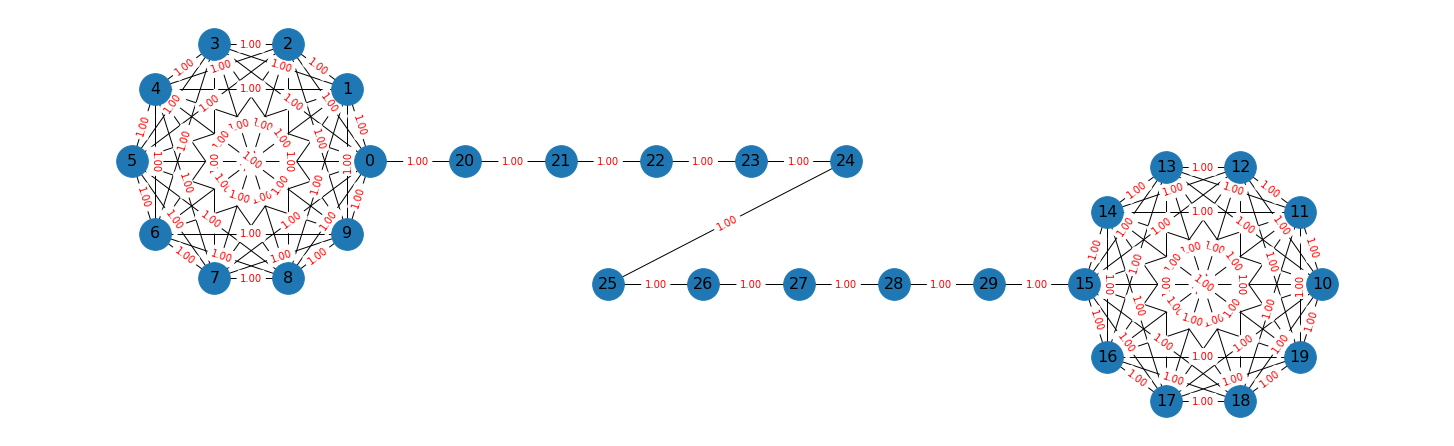

In [12]:
if __name__ == "__main__":
    barbell, barbell_pos=generate_barbell(10,10)
    draw_graph(barbell, barbell_pos, None)
    None